# Faculty Diversity in Sex

In [8]:
%%capture

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams.update({'font.size': 16})
plt.tight_layout()

In [9]:
xls = pd.ExcelFile('../data/gender.xlsx')

dfs = dict(pd.read_excel(xls, sheet_name=None))

In [15]:
allDivisions = [ 'HUM', 'NAT', 'SOC' ]
divisions = {
    'HUM': 'Humanities',
    'NAT': 'Natural Sciences',
    'SOC': 'Social Sciences',
}

allStatuses = [ 'NE', 'EL', 'TE' ]
statuses = {
    'NE': 'not eligible for tenure',
    'EL': 'not tenured, but eligible for tenure',
    'TE': 'tenured',
}

In [26]:
def lineGraph(ax, div, status, abbrev=False):
    if isinstance(div, int) and isinstance(status, int):
        div = allDivisions[div]
        status = allStatuses[status]
        
    df = dfs['{}-{}'.format(div, status)]
    name = '{}, {}'.format(
        divisions[div],
        status if abbrev else statuses[status]
    )
    
    ax.plot(df['Year'], df['% Women'])
    ax.grid()
    ax.axis(ymin=0, ymax=1)
    ax.set(xlabel='Year', ylabel='% Women', title=name)

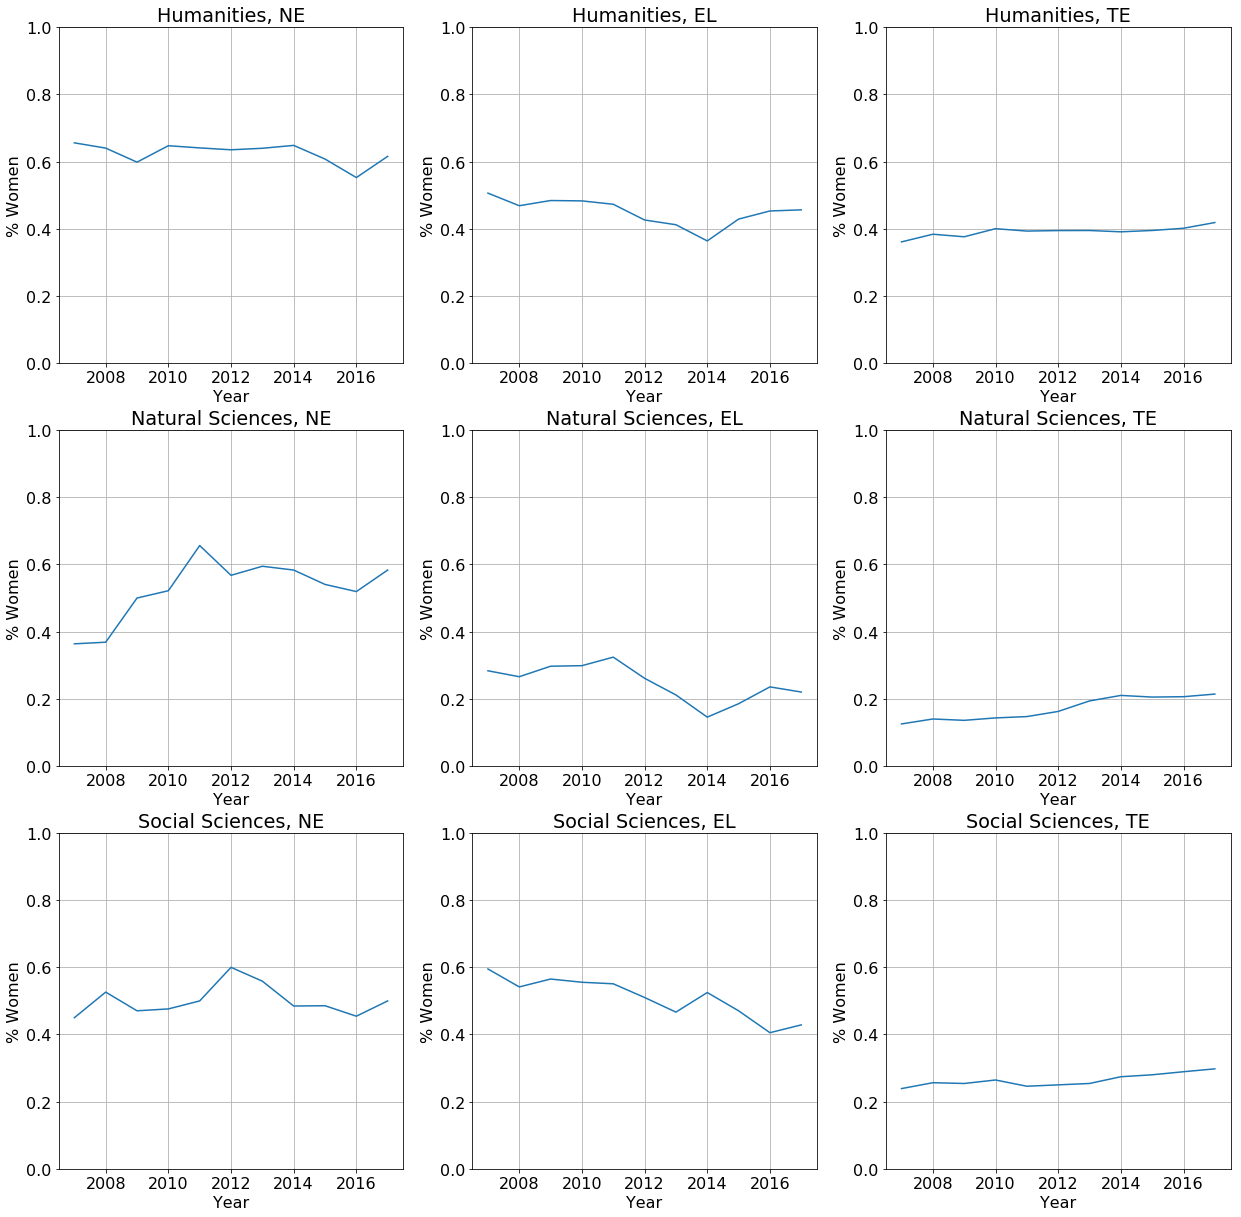

In [27]:
fig, ax = plt.subplots(3, 3, figsize=(21, 21))

for i in range(9):
    lineGraph(ax[i//3, i%3], i // 3, i % 3, abbrev=True)